Average Precision Score:
Logistic Regression: 0.928
Decision Tree:       0.799
Logistic Regression performs better.


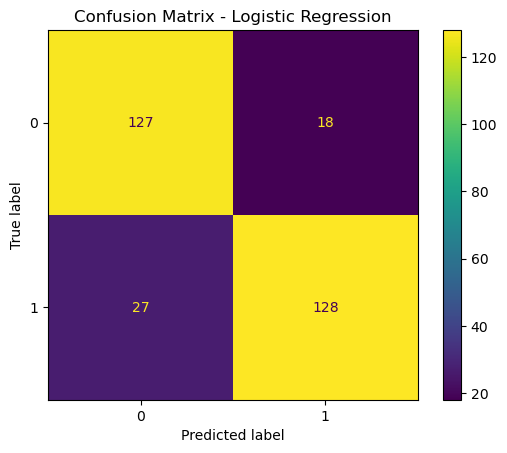

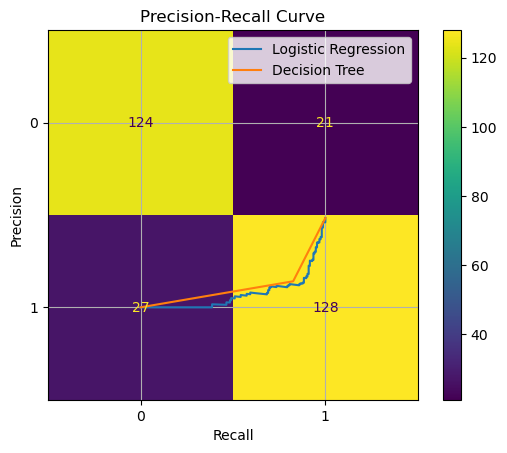

In [172]:
import os
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve, average_precision_score

# 1. Create directory to save results
os.makedirs("results", exist_ok=True)

# 2. Generate sample binary classification data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4. Train two models
model1 = LogisticRegression()
model2 = DecisionTreeClassifier()

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# 5. Predict probabilities
probs1 = model1.predict_proba(X_test)[:, 1]
probs2 = model2.predict_proba(X_test)[:, 1]

# 6. Predict labels
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

# 7. Plot Confusion Matrices
cm1 = confusion_matrix(y_test, pred1)
cm2 = confusion_matrix(y_test, pred2)

disp1 = ConfusionMatrixDisplay(cm1)
disp2 = ConfusionMatrixDisplay(cm2)

disp1.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.savefig("results/confusion_matrix_logreg.png")


disp2.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.savefig("results/confusion_matrix_tree.png")


# 8. Precision-Recall Curve
prec1, rec1, _ = precision_recall_curve(y_test, probs1)
prec2, rec2, _ = precision_recall_curve(y_test, probs2)

plt.plot(rec1, prec1, label='Logistic Regression')
plt.plot(rec2, prec2, label='Decision Tree')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.savefig("results/precision_recall_curve.png")


# 9. Compare Performance
ap1 = average_precision_score(y_test, probs1)
ap2 = average_precision_score(y_test, probs2)

print("Average Precision Score:")
print(f"Logistic Regression: {ap1:.3f}")
print(f"Decision Tree:       {ap2:.3f}")

if ap1 > ap2:
    print("Logistic Regression performs better.")
else:
    print("Decision Tree performs better.")
